# Iris dataset analysis

## Dataset description.

In [70]:
# import  libraries
import pandas as pd # for working with dataframes
import numpy as np # for working with arrays and creating some visualisations and calculations
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for some visualisations

In [71]:
# download the data set 
# 'names = []' will set column names for the datafrane
# Ref.[2] 
data = pd.read_csv("/Users/katelisovenko/Yandex.Disk.localized/kate/springboard/pands_project/iris/iris.data", names=['sep_length', 'sep_width', 'pet_length','pet_width','class'])
data.sample(10)# to have a look at the data sample

,sep_length,sep_width,pet_length,pet_width,class
90,5.5,2.6,4.4,1.2,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
135,7.7,3.0,6.1,2.3,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [72]:
# getting statistical info
data.describe()

,sep_length,sep_width,pet_length,pet_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
# getting general info about dataframe
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sep_length  150 non-null    float64
 1   sep_width   150 non-null    float64
 2   pet_length  150 non-null    float64
 3   pet_width   150 non-null    float64
 4   class       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
# To get the lines with dublicates if there is ones:
# Ref.[3]
duplicated = data[data.duplicated()]
duplicated

,sep_length,sep_width,pet_length,pet_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## Dataset overview:

The dataset contains 150 entries, 3 of them are duplicated, none missed. 

Columns "sep_length", "sep_width",	"pet_length", "pet_width", contain float type data, the "class" column- object type.

Statistical info reflects the general information about all the classes together. That means, for instance, that the mean sepal length was calculated without specifying the class of Iris. Nevertheless, I will provide some description:

* The mean **sepal length** is 5.84 mm, median  is 5.8 mm., std = 0.82 
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.

* The mean **sepal width** is 3.05 mm, median  is 3.00 mm., std = 0.42
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.

* The mean **petal length** is 3.76 mm, median  is 4.35 mm., std = 1.76
The distribution might not be symmetrical.  The data has spread significantly around the mean.

* The mean **petal width** is 1.20 mm, median  is 1.30 mm., std = 0.76
The distribution of the sepal length is approximately symmetrical. The data has a low level of variation around the mean.


## Distribution of data.

In a previous paragraph, I specified some statistical information about variables. Now I am going to create histograms which depict this information vividly. To make these histograms even more informative, I will categorize the data by class. 

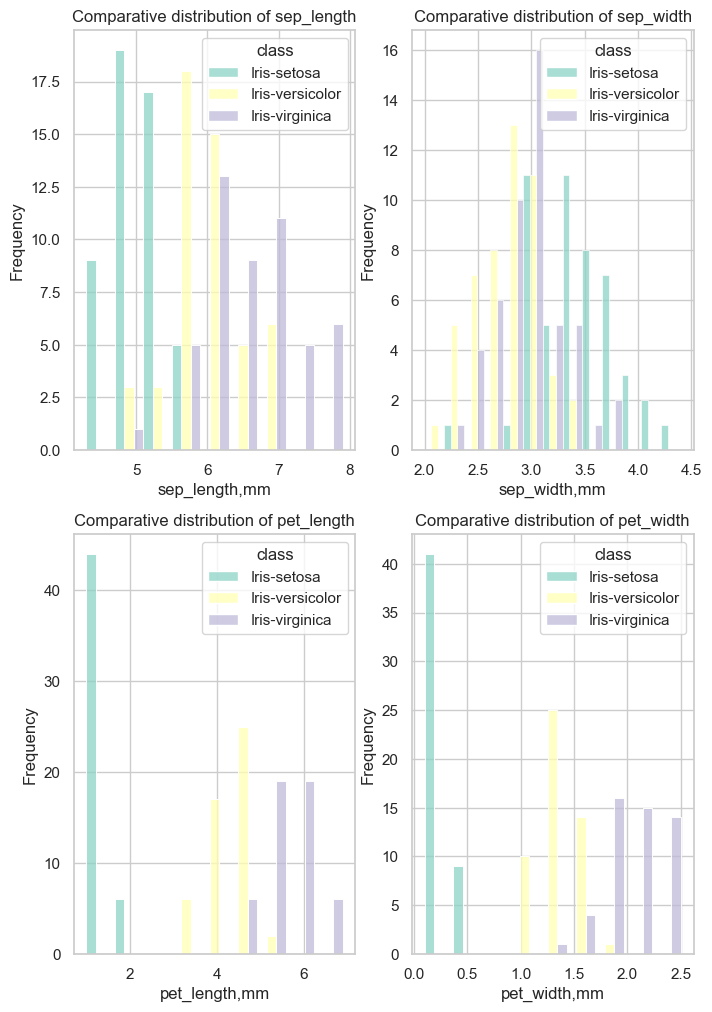

Figure 1


In [75]:
# I am creating histogram in the Seaborn, as I believe it is
# the easy way to use additional parameters such as "hue" and "multiple" to get the clear visualisation.
# Ref.[4][5]

# This program takes a column and creates a distribution histogram for it's data.
# 'column' is a columns's name in dataframe.
# 'hue' is an additional parameter for data categorization, in my case it is the class of flowers. 

def plot_hist_hue(data, column, hue):  
    sns.histplot(data=data, x= data[column], hue = hue , multiple = 'dodge')
    plt.title(f'Comparative distribution of {column}')
    plt.xlabel(f'{column},mm')
    plt.ylabel('Frequency')

fig, ax = plt.subplots(2, 2, figsize=(8, 12))  # creating a figure and a grid of subplots with 2 rows and 2 columns

plt.subplot(2,2,1) # first hist
plot_hist_hue(data=data, column = 'sep_length', hue = 'class')

plt.subplot(2,2,2) # second hist
plot_hist_hue(data=data, column = 'sep_width', hue = 'class')

plt.subplot(2,2,3) # third hist
plot_hist_hue(data=data, column = 'pet_length', hue = 'class')

plt.subplot(2,2,4) # fourth hist
plot_hist_hue(data=data, column = 'pet_width', hue = 'class')

plt.show()
plt.close()
print('Figure 1')


The figure 1 displays the distribution of variables "sep_length","sep_width","pet_length","pet_width" among four flower classes. For prompt comparing distributions, these plots are useful. To analyze the distribution of each class variable more closely, I will create the boxplots (catplot in the Seaborn library).

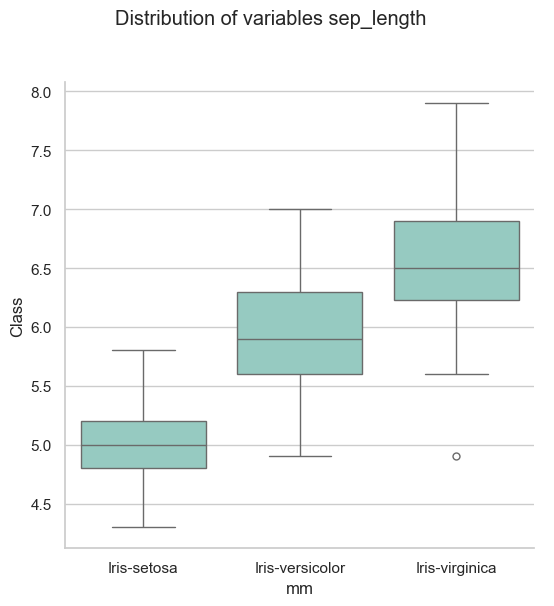

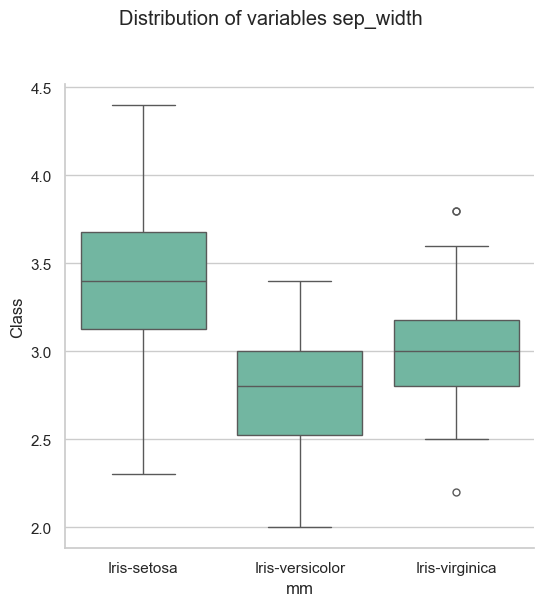

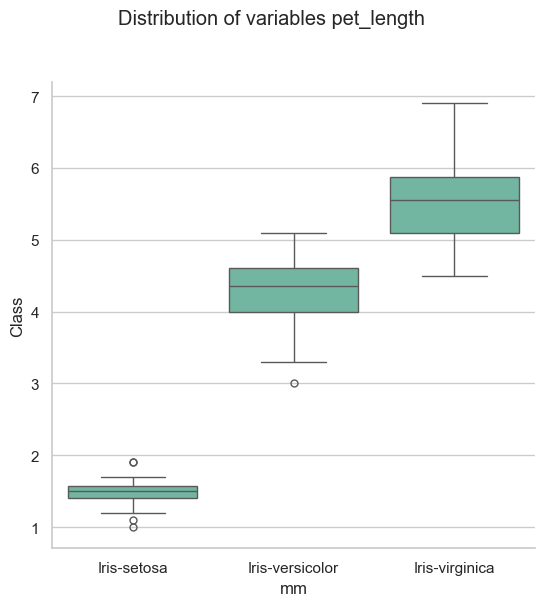

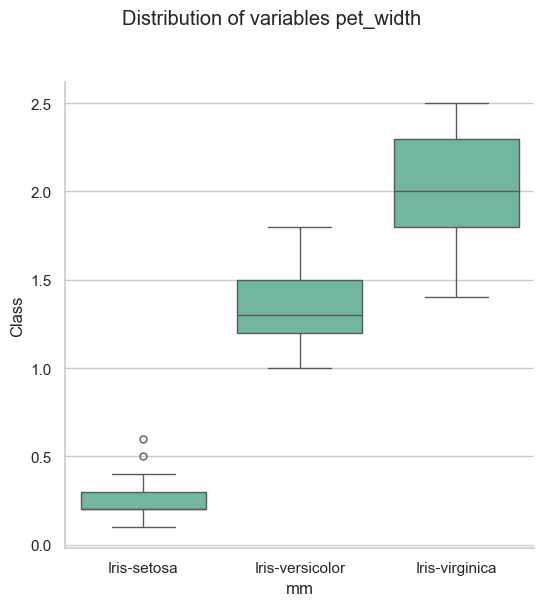

Figure 2


In [76]:
# Ref.: [6]
# creating a list of columns wich I want to analyse:
variables = ['sep_length','sep_width','pet_length','pet_width']
# each iteration the sns.catplot will create one plot with data from the list
for var in variables:
   
    g= sns.catplot(data=data,x= 'class', y= var, kind="box", height= 5.5) #height is a size parametr
    g.figure.suptitle(f"Distribution of variables {var}", y= 1.1) # y=1.1 is a heigth of title parametr
    g.set(xlabel= "mm", ylabel= 'Class')
    sns.set_theme(style='whitegrid', palette='Set2')# parametrs to change the style
 

plt.show()
plt.close()
print('Figure 2')      

On the boxplot of **sepal length** distribution it is seen that:
* *Iris virginica* has the biggest measurements of this feature (median is 6.5 mm)
* *Iris Setosa* is the smallest one (median is 5.0 mm)
* *Iris versicolor* is somewhere in between (5.9 mm).
* There are some outliers in *Iris Virginica* data and it's distribution is slightly right-skewed.

Next boxplot reveals that *Iris Setosa* **sepal width** is the most diverse one with min and max marks at 2.3 and 4.4 mm respectively and the median is 3.4 mm.
* Some outliers are in *Iris Virginica* data. Median is 3.0 mm. 
* *Iris Versicolor* data is slightly skewed to the left and it's median is about 2.7 mm- the smallest one.

The other boxplots in Figure 2 demonstrate that *Iris Setosa* has the smallest **petal length** and **width** compared to other Iris classes. Its data shows a relatively small diapason with some outliers.
* The median **petal width** for *Iris Setosa* is almost equal to the 25th percentile. This indicates that the data is skewed towards smaller scales.
* *Iris Virginica* generally has the biggest **petal length** and **width**, however the **petal width** is quite diverse.
* *Iris Versicolor* data is somewhere in the middle between Sentosa and Virginia. 

## Relationship between variables.

For a better understanding the relationship between the given variables I am creating a scatterplot visualization. Scatterplots will demonstrate if there is any correlation and help to look closely at differences and similarities among the flower classes.

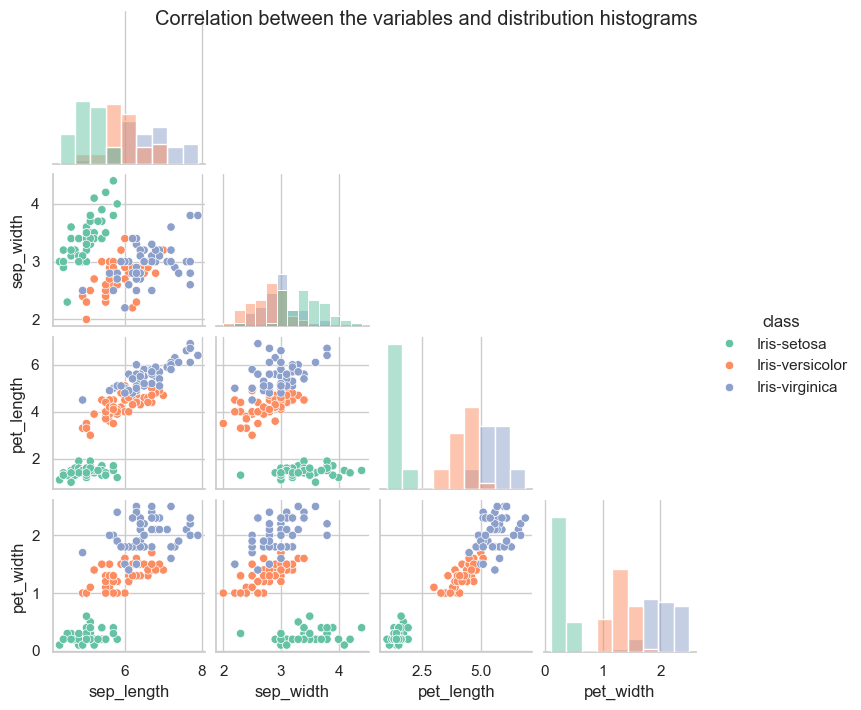

In [77]:
# Ref.:[7]
# corner=True parameter leaves only necessary plots without mirroring them.
# diag_kind="hist" - shows the distribution histograms of the variables 
# height -is a size parametr
g =sns.pairplot(data, hue='class',diag_kind="hist", corner=True, height=1.8)
plt.suptitle('Correlation between the variables and distribution histograms')
plt.show()

The scatterplot reveals that some of the variables demonstrate nearly perfect positive correlation (petal length and petal width). Other plots shows that different flower classes have different correlation between the same variables (petal width and sepal width). For better understanding, I will calculate the coefficients of correlation between variables for each flower class. 

In [78]:
# I am creating 3 dataframes filtering them by class. 
setosa_data = data[data['class']== 'Iris-setosa']
virginica_data = data[data['class']== 'Iris-virginica']
versicolor_data = data[data['class']== 'Iris-versicolor']

# for calculating the correlation matrix (all the variables together) I need to filter data again leaving only nessesary columns.
# Ref.[8] I am using drop method to delete the column 'class'.
setosa_data = setosa_data.drop(columns=['class'])
virginica_data = virginica_data.drop(columns=['class'])
versicolor_data = versicolor_data.drop(columns=['class'])

# now I can calculate the coefficients for each class.
# the round function leaves two digits after the decimal point
# Ref.[9]
corr_matrix_setosa = round(setosa_data.corr(),2)
corr_matrix_virginica = round(virginica_data.corr(),2)
corr_matrix_versicolor = round(versicolor_data.corr(),2)

print('The coeffitients of correlation for Iris Setosa')
display(corr_matrix_setosa)
print('-------------------------------------------------')

print('The coeffitients of correlation for Iris Virginica')
display(corr_matrix_virginica)
print('-------------------------------------------------')

print('The coeffitients of correlation for Iris Versicolor')
display(corr_matrix_versicolor)
print('-------------------------------------------------')


The coeffitients of correlation for Iris Setosa


,sep_length,sep_width,pet_length,pet_width
sep_length,1.00,0.75,0.26,0.28
sep_width,0.75,1.00,0.18,0.28
pet_length,0.26,0.18,1.00,0.31
pet_width,0.28,0.28,0.31,1.00


-------------------------------------------------
The coeffitients of correlation for Iris Virginica


,sep_length,sep_width,pet_length,pet_width
sep_length,1.00,0.46,0.86,0.28
sep_width,0.46,1.00,0.40,0.54
pet_length,0.86,0.40,1.00,0.32
pet_width,0.28,0.54,0.32,1.00


-------------------------------------------------
The coeffitients of correlation for Iris Versicolor


,sep_length,sep_width,pet_length,pet_width
sep_length,1.00,0.53,0.75,0.55
sep_width,0.53,1.00,0.56,0.66
pet_length,0.75,0.56,1.00,0.79
pet_width,0.55,0.66,0.79,1.00


-------------------------------------------------


Now the coefficients of correlation can support the insights obtained from the scatterplots. All the correlations are positive.
 
**Iris Setosa:**
* The most significant correlation is observed between *sepal length* and *sepal width* (0.75)
* Correlation among the other variables is not obvious.

**Iris Virginica**
* The most significant correlation is observed between *sepal length* and *petal length* (0.86)
* The correlation between *sepal length*/*sepal width* and *sepal width*/*petal width* is also noticeable (0.46 and 0.54 respectively) 

**Iris Versicolor**
* The most significant correlation is observed between *petal length* and *petal width* (0.79)
* The sepal length and petal length have a correlation coefficient of 0.75 which shows a good correlation.
* All the other coefficients demonstrate a strong relationship between the variables. 



## Conclusion.
During this project, I used Python libraries to create visual representations and perform statistical analyses. Working on the project I tried to use Python's tools to filter the data and get the insights of each class separately. 
The Seaborn library allows the creation of visualizations with added parameters without the need to filter the data beforehand, which was most helpful.
Also, I used the Pandas library to filter and split the data to analyze each class separately. The method of calculation correlation matrix with Pandas was also effective and convenient. Through this process, I discovered that seemingly similar entities, like Iris flowers, can demonstrate notable differences under closer inspection.

# End
__________________________